## Assignment 6: Logistic Regression

Problem statement: Output variable -> y  
y -> Whether the client has subscribed a term deposit or not  
Binomial ("yes" or "no")


In [82]:
# import liberaries
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.utils import resample
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

In [83]:
# load dataset
data = pd.read_csv("bank-full.csv", sep = ";")
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [84]:
df = data.replace('unknown', np.nan)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,no


# EDA and data cleaning

In [85]:
print(df.shape)
df.isnull().sum()

(45211, 17)


age              0
job            288
marital          0
education     1857
default          0
balance          0
housing          0
loan             0
contact      13020
day              0
month            0
duration         0
campaign         0
pdays            0
previous         0
poutcome     36959
y                0
dtype: int64

In [86]:
# dropping columns poutcome because of a lot of missing data and contact because of irrelevence
df.drop(columns = ['poutcome', 'contact'], axis = 1, inplace = True)

In [87]:
df_new = df.dropna()


In [88]:
df_new.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
y            0
dtype: int64

In [89]:
df_new.shape

(43193, 15)

In [90]:
X= df_new.drop(columns = 'y', axis = 1)
y= df_new['y'].map({'yes':1, 'no':0})
X.describe()

,age,balance,day,duration,campaign,pdays,previous
count,43193.000000,43193.000000,43193.000000,43193.000000,43193.000000,43193.000000,43193.000000
mean,40.764082,1354.027342,15.809414,258.323409,2.758178,40.404070,0.584863
std,10.512640,3042.103625,8.305970,258.162006,3.063987,100.420624,2.332672
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,71.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,442.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1412.000000,21.000000,318.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,58.000000,871.000000,275.000000


In [91]:
X.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097602,-0.008451,-0.004953,0.004050,-0.023248,0.001099
balance,0.097602,1.000000,0.004118,0.020051,-0.016251,0.003928,0.016564
day,-0.008451,0.004118,1.000000,-0.030074,0.164982,-0.094343,-0.052053
duration,-0.004953,0.020051,-0.030074,1.000000,-0.083118,-0.002403,0.000295
campaign,0.004050,-0.016251,0.164982,-0.083118,1.000000,-0.088920,-0.032381
pdays,-0.023248,0.003928,-0.094343,-0.002403,-0.088920,1.000000,0.452953
previous,0.001099,0.016564,-0.052053,0.000295,-0.032381,0.452953,1.000000


In [92]:
x = pd.get_dummies(X)

Text(0.5, 1.0, 'highly imbalanced Target')

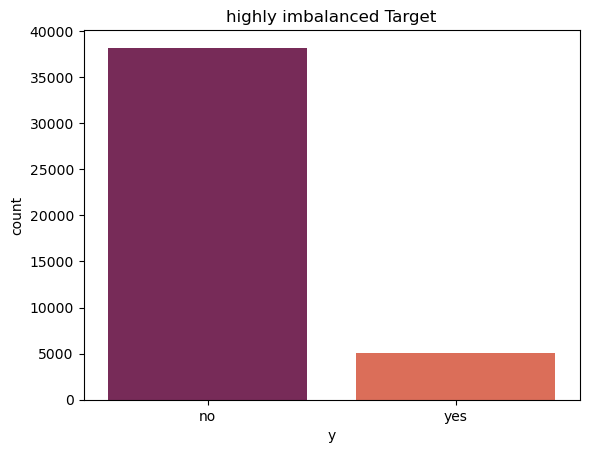

In [93]:
sns.countplot(x= df_new['y'],palette='rocket')
plt.title("highly imbalanced Target")

In [94]:
classifier = LogisticRegression()
classifier.fit(x,y)

C:\Users\Renu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [95]:
y_pred = classifier.predict(x)
y_pred_df= pd.DataFrame({'actual': y,'predicted': classifier.predict(x)})
y_pred_df

,actual,predicted
0,0,0
1,0,0
2,0,0
5,0,0
6,0,0
...,...,...
45206,1,1
45207,1,0
45208,1,1
45209,0,0


In [96]:
# Confusion Matrix for the model accuracy
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y,y_pred)
print (cm)


[[37443   729]
 [ 4009  1012]]


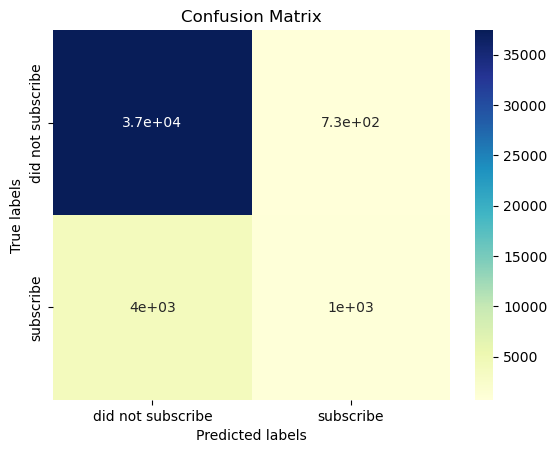

In [97]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax, cmap="YlGnBu"); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not subscribe', 'subscribe']); ax.yaxis.set_ticklabels(['did not subscribe', 'subscribe'])
plot_confusion_matrix(y,y_pred)
plt.show()

In [98]:
print(y_pred_df[(y_pred_df.actual==1) & (y_pred_df.predicted==1)].count())
print(y_pred_df[(y_pred_df.actual==0) & (y_pred_df.predicted==0)].count())
print(y_pred_df[(y_pred_df.actual==1) & (y_pred_df.predicted==0)].count())
print(y_pred_df[(y_pred_df.actual==0) & (y_pred_df.predicted==1)].count())

actual       1012
predicted    1012
dtype: int64
actual       37443
predicted    37443
dtype: int64
actual       4009
predicted    4009
dtype: int64
actual       729
predicted    729
dtype: int64


In [99]:
round(classifier.score(x, y),2)

0.89

In [100]:
#Classification report
## Precision – What percent of your predictions were correct?
## Recall – What percent of the positive cases did you catch? 
## F1 score – What percent of positive predictions were correct?
from sklearn.metrics import classification_report
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     38172
           1       0.58      0.20      0.30      5021

    accuracy                           0.89     43193
   macro avg       0.74      0.59      0.62     43193
weighted avg       0.87      0.89      0.87     43193



**Since the Target is highly imbalaced towards 1, we need different matrices to evaluate the model such as ROC and AreaUnderCurve (AUC)**

In [101]:
pred_p= classifier.predict_proba(x)[:,1]
y_pred_df['predicted prob']= pred_p.round(3)
y_pred_df

,actual,predicted,predicted prob
0,0,0,0.054
1,0,0,0.037
2,0,0,0.034
5,0,0,0.063
6,0,0,0.093
...,...,...,...
45206,1,1,0.569
45207,1,0,0.179
45208,1,1,0.504
45209,0,0,0.075


In [102]:
# ROC Curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
fpr, tpr, thresholds = roc_curve(y, pred_p)

auc = roc_auc_score(y, y_pred)
print("fpr, tpr, thresholds :", '\n', '\n', fpr, '\n', '\n', tpr, '\n', '\n',thresholds, '\n', '\n')



fpr, tpr, thresholds : 
 
 [0.00000000e+00 2.61972126e-05 5.23944252e-05 ... 9.97956617e-01
 9.97956617e-01 1.00000000e+00] 
 
 [0.         0.         0.         ... 0.99980084 1.         1.        ] 
 
 [1.99999957e+00 9.99999573e-01 9.99986095e-01 ... 2.03015023e-06
 1.98935774e-06 3.10674415e-11] 
 



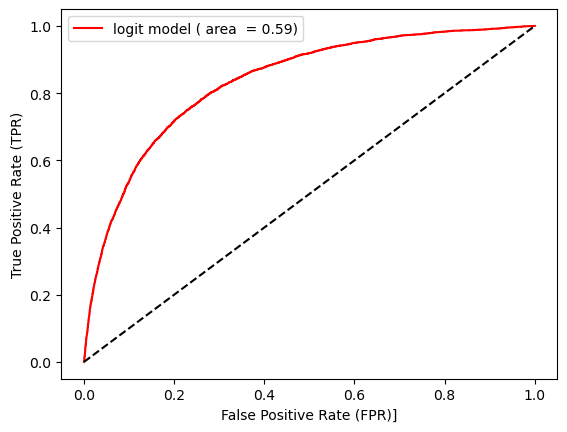

In [103]:
# plot ROC curve
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate (FPR)]')
plt.ylabel('True Positive Rate (TPR)')
plt.legend()
plt.show()

In [104]:
print("AUC :", auc)

AUC : 0.5912278537029105


# oversampling the minority class and improving the model

In [106]:
!pip install -U imbalanced-learn

In [107]:
import imblearn
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

In [108]:
# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy='minority')

In [109]:
x_over, y_over = oversample.fit_resample(x, y)
# summarize class distribution
print(Counter(y))
# summarize class distribution
print(Counter(y_over))

Counter({0: 38172, 1: 5021})
Counter({0: 38172, 1: 38172})


In [110]:
classifier1 = LogisticRegression()
classifier1.fit(x_over,y_over)

C:\Users\Renu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [111]:
round(classifier1.score(x_over, y_over),2)

0.8

In [112]:
y_pred1 = classifier1.predict(x)

In [117]:
# ROC Curve
fpr1, tpr1, thresholds1 = roc_curve(y, classifier1.predict_proba(x)[:,1])

auc1 = roc_auc_score(y, y_pred1)

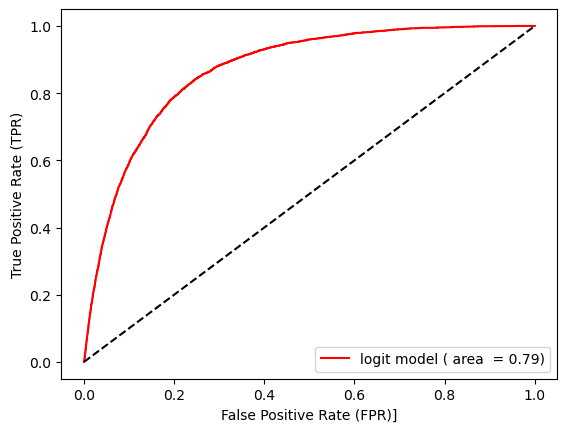

In [118]:
# plot ROC curve
plt.plot(fpr1, tpr1, color='red', label='logit model ( area  = %0.2f)'%auc1)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate (FPR)]')
plt.ylabel('True Positive Rate (TPR)')
plt.legend()
plt.show()

In [119]:
print("AUC :", auc1)

AUC : 0.7939162564280218


**Outcome: Oversampling the minr class improved the prediction power of the logistic regressor**